In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import stemgraphic

## Dataset

In [2]:
df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))

In [4]:
df

,A,B,C,D
0,2,85,46,49
1,59,88,76,66
2,32,28,92,95
3,7,16,40,39
4,61,74,71,60
...,...,...,...,...
95,94,26,7,44
96,25,73,10,58
97,27,37,50,9
98,57,59,64,77


## Medidas de localizacion

### Media (promedio)

In [11]:
df.mean()

A    50.55
B    46.16
C    52.45
D    51.30
dtype: float64

### Moda

In [14]:
df.A.mode()

0     4
1     5
2    16
3    25
4    26
5    45
6    82
7    96
dtype: int64

### Mediana

In [15]:
df.A.median()

50.5

## Medidas de dispercion

### Varianza

In [16]:
df.A.var()

845.1186868686867

### Desviacion estandar

In [19]:
math.sqrt(df.A.var())

29.070925112020202

### Desviacion media

In [20]:
df.A.mad()

25.390000000000008

### Rango

In [25]:
df.A.max()-df.A.min()

97

### Coeficiente de variacion

In [26]:
math.sqrt(df.A.var())/df.A.mean()

0.5750924849064333

### Frecuencias absolutas

In [28]:
df['A'].value_counts() 

25    3
96    3
26    3
4     3
5     3
     ..
54    1
48    1
47    1
42    1
0     1
Name: A, Length: 64, dtype: int64

### Frecuencias absolutas acumuladas

In [29]:
df['A'].cumsum()

0       86
1      122
2      200
3      216
4      241
      ... 
95    4963
96    5001
97    5030
98    5034
99    5055
Name: A, Length: 100, dtype: int64

### Frecuencia relativa

In [30]:
df['A'].value_counts() /100

25    0.03
96    0.03
26    0.03
4     0.03
5     0.03
      ... 
54    0.01
48    0.01
47    0.01
42    0.01
0     0.01
Name: A, Length: 64, dtype: float64

### Frecuencia relativa acumulada

In [34]:
(df['A'].value_counts() /100).cumsum()

25    0.03
96    0.06
26    0.09
4     0.12
5     0.15
      ... 
54    0.96
48    0.97
47    0.98
42    0.99
0     1.00
Name: A, Length: 64, dtype: float64

### Cuantiles

In [35]:
df.A.quantile(.2) 

21.8

### Coeficiente de asimetria

In [36]:
df.A.skew()

-0.12709710957401749

### Curtosis

In [37]:
df.A.kurtosis()

-1.2486147860573797

## Descripciones graficas

## Nuevo Dataset

In [3]:
df['ClaseA'] = np.random.randint(0,4,size=(100, 1))
df['ClaseB'] = np.random.randint(0,4,size=(100, 1))
df['ClaseC'] = np.random.randint(0,7,size=(100, 1))
df['ClaseD'] = np.random.randint(0,5,size=(100, 1))
df

,A,B,C,D,ClaseA,ClaseB,ClaseC,ClaseD
0,84,10,3,43,1,0,0,1
1,9,32,81,3,1,1,6,2
2,91,53,27,31,0,2,0,3
3,92,3,44,35,3,3,1,1
4,73,6,58,47,1,1,6,1
...,...,...,...,...,...,...,...,...
95,11,92,19,67,0,0,5,2
96,10,20,57,45,3,0,2,4
97,72,7,99,92,2,3,3,2
98,89,66,87,39,1,3,4,3


### Diagrama de barras

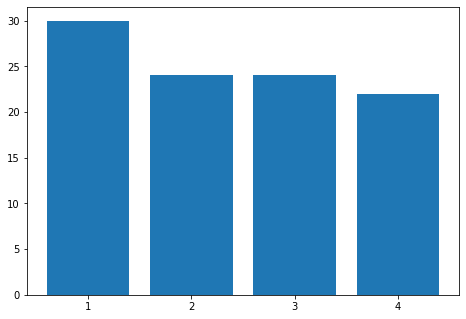

In [52]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
columns = ['1', '2', '3', '4']
values = df['ClaseA'].value_counts()
ax.bar(columns,values)
plt.show()

### Histograma

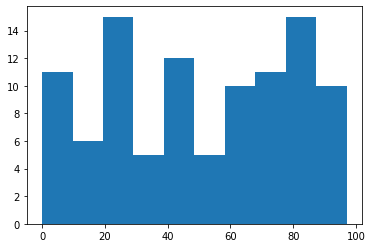

In [57]:
plt.hist(df['A'], bins = 10)
plt.show()

### Grafica de pastel

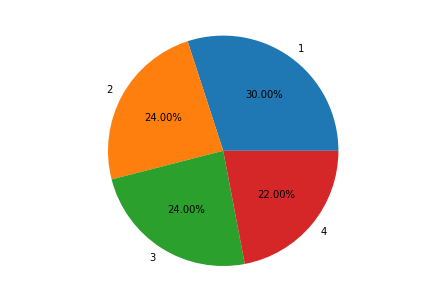

In [59]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
columns = ['1', '2', '3', '4']
values = df['ClaseA'].value_counts()
ax.pie(values, labels = columns,autopct='%1.2f%%')
plt.show()

### Grafica de tallo y de hojas

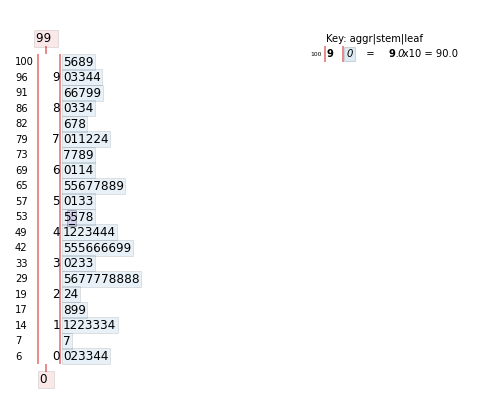

In [14]:
fig, ax = stemgraphic.stem_graphic(df.A)

### BoxPlot

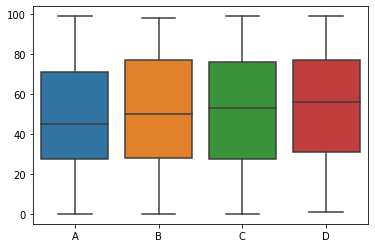

In [17]:
ax = sns.boxplot(data=df[['A','B','C','D']])

## Descripciones para datos conjuntos

### Frecuencia para datos conjuntos

In [6]:
df.groupby(["ClaseA", "ClaseB"]).size()

ClaseA  ClaseB
0       0          5
        1          6
        2          5
        3          5
1       0          7
        1         10
        2          5
        3          8
2       0          7
        1          5
        2          3
        3          9
3       0          6
        1          2
        2          6
        3         11
dtype: int64

### Covarianza

In [19]:
x = df[['A','B']].to_numpy().T
np.cov(x,bias=True)

array([[ 915.5731, -144.7262],
       [-144.7262,  916.7124]])

### Coeficiente de correlacion

In [12]:
np.corrcoef(df["A"],df["B"])

array([[ 1.        , -0.15797345],
       [-0.15797345,  1.        ]])